<a href="https://colab.research.google.com/github/thobui1308/streamlit-telecom-customer-churn/blob/streamlit_customer_churn/Final_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path= '/content/drive/MyDrive/Colab Notebooks/Data_Telco_Customer_Churn.xlsx'
Demo = pd.read_excel(file_path, sheet_name = 'Telco_Demo')
Services = pd.read_excel(file_path, sheet_name = 'Telco_Services')
Status = pd.read_excel(file_path, sheet_name = 'Telco_Status')

#1.Data Preprocessing for Dashboard

##Demo

In [ ]:
Demo.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,Male,78,No,Yes,No,No,0
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1


In [ ]:
Demo.shape

(7043, 8)

In [ ]:
Demo.isnull().sum()

Customer ID             0
Gender                  0
Age                     0
Under 30                0
Senior Citizen          0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

### Add columns: Age Range

In [ ]:
Demo["Age Range"]= np.where(Demo['Age'] < 30, "Under 30", np.where(Demo['Age'] > 65, "Over 65", "From 30 To 65"))
Demo.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Age Range
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Over 65
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Over 65
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Over 65
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Over 65
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Over 65


### Delete unwanted columns




In [ ]:
#columns_to_drop = ['Under 30', 'Senior Citizen']
#Demo.drop(columns_to_drop, axis=1, inplace=True)
#Demo.head()

## Services

In [ ]:
Services.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,DSL,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
Services.shape

(7043, 28)

In [ ]:
Services.isna().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Charges                     

###Replace blanks: Offer column and Internet Type column

In [ ]:
Services['Offer'] = np.where(Services['Offer'].isna() == True, "No Offer", Services['Offer'])

In [ ]:
Services['Internet Type'] = np.where(Services['Internet Type'].isna() == True, "No Internet Type", Services['Internet Type'])

##Status

In [ ]:
Status.head()

,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [ ]:
Status.shape

(7043, 9)

In [ ]:
Status.isnull().sum()

Customer ID              0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

###Replace blank values in Churn Category, Churn Reason

In [ ]:
Status['Churn Category'] = np.where(Status['Churn Category'].isna() == True, "No churn", Status['Churn Category'])

In [ ]:
Status['Churn Reason'] = np.where(Status['Churn Reason'].isna() == True, "No churn", Status['Churn Reason'])

###Calculate Churn Score quantiles and CLTV quantiles

In [ ]:
Status.describe()

,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.244924,0.265370,58.505040,4400.295755
std,1.201657,0.441561,21.170031,1183.057152
min,1.000000,0.000000,5.000000,2003.000000
25%,3.000000,0.000000,40.000000,3469.000000
50%,3.000000,0.000000,61.000000,4527.000000
75%,4.000000,1.000000,75.500000,5380.500000
max,5.000000,1.000000,96.000000,6500.000000


###Add colum Churn Score Category

In [ ]:
Status['Churn Score Category'] = Status.apply(lambda x: "Group 1" if x['Churn Score'] < 40
                             else "Group 2" if x['Churn Score'] < 61
                             else "Group 3" if x['Churn Score'] < 76
                             else "Group 4", axis = 1)

###Add column CLTV Category

In [ ]:
Status['CLTV Category'] = Status.apply(lambda x: "Group 1" if x['CLTV'] < 3469
                             else "Group 2" if x['CLTV'] < 4527
                             else "Group 3" if x['CLTV'] < 5380.5
                             else "Group 4", axis = 1)

##Merge data into one table

In [ ]:
data = Demo.merge(Services, on = 'Customer ID', how = 'inner').merge(Status, on = 'Customer ID', how = 'inner')
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Age Range,Referred a Friend,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Churn Score Category,CLTV Category
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Over 65,No,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Group 4,Group 4
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Over 65,Yes,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Group 3,Group 3
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Over 65,No,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Group 4,Group 1
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Over 65,Yes,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Group 4,Group 3
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Over 65,Yes,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,Group 3,Group 1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Age Range                          7043 non-null   object 
 9   Referred a Friend                  7043 non-null   object 
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-null   int64

In [ ]:
data.to_excel('df_dashboard.xlsx')

#2.Model

##Preprocessing Dataset for Model

### Read Data

In [ ]:
file_path= '/content/drive/MyDrive/Colab Notebooks/Data_Telco_Customer_Churn.xlsx'
Demo = pd.read_excel(file_path, sheet_name = 'Telco_Demo')
Services = pd.read_excel(file_path, sheet_name = 'Telco_Services')
Status = pd.read_excel(file_path, sheet_name = 'Telco_Status')

### Merge data into one table

In [ ]:
data = Demo.merge(Services, on = 'Customer ID', how = 'inner').merge(Status, on = 'Customer ID', how = 'inner')
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,No,0,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Yes,1,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,No,0,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Yes,1,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Yes,1,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


### Delete unwanted column

In [ ]:
columns_to_drop = ['Customer ID','Under 30','Senior Citizen', 'Churn Label', 'Customer Status','Churn Category','Churn Reason']
data.drop(columns_to_drop, axis=1, inplace=True)
data.head()

,Gender,Age,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
0,Male,78,No,No,0,No,0,1,NaN,No,...,39.65,39.65,0.00,20,0.00,59.65,3,1,91,5433
1,Female,74,Yes,Yes,1,Yes,1,8,Offer E,Yes,...,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,5302
2,Male,71,No,Yes,3,No,0,18,Offer D,Yes,...,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,3179
3,Female,78,Yes,Yes,1,Yes,1,25,Offer C,Yes,...,98.50,2514.50,13.43,0,494.00,2995.07,2,1,88,5337
4,Female,80,Yes,Yes,1,Yes,1,37,Offer C,Yes,...,76.50,2868.15,0.00,0,234.21,3102.36,2,1,67,2793


In [ ]:
data.columns.values

array(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Value',
       'Churn Score', 'CLTV'], dtype=object)

In [ ]:
data.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000


### Replace

In [ ]:
data.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Dependents                              0
Number of Dependents                    0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                          

In [ ]:
data['Offer'] = np.where(Services['Offer'].isna() == True, "No Offer", Services['Offer'])
data['Internet Type'] = np.where(Services['Internet Type'].isna() == True, "No Internet Type", Services['Internet Type'])
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,No,0,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Yes,1,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,No,0,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Yes,1,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Yes,1,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


###Save data

In [ ]:
# các cột có giá trị 'Yes' và 'No'
binary_columns = ['Married', 'Dependents', 'Referred a Friend',
                  'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                  'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                  'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
                  'Paperless Billing']

# các giá trị 'Yes' thành 1 và 'No' thành 0 trong các cột có giá trị là 'Yes' và 'No'
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# các cột khác
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Offer'] = data['Offer'].map({'Offer A': 1, 'Offer B': 2, 'Offer C': 3, 'Offer D': 4, 'Offer E': 5, 'No Offer': 6})
data['Internet Type'] = data['Internet Type'].map({'DSL': 1, 'Fiber Optic': 2, 'Cable': 3, 'No Internet Type': 4})
data['Contract'] = data['Contract'].map({'Month-to-Month': 1, 'One Year': 2, 'Two Year': 3})
data['Payment Method'] = data['Payment Method'].map({'Bank Withdrawal': 1, 'Credit Card': 2, 'Mailed Check': 3})
#data['Age Range'] = data['Age Range'].map({'Under 30': 1, 'From 30 To 65': 2, 'Over 65': 3})
#data['Churn Score Category'] = data['Churn Score Category'].map({'Group 1': 1, 'Group 2': 2, 'Group 3': 3, 'Group 4': 4})
#data['CLTV Category'] = data['CLTV Category'].map({'Group 1': 1, 'Group 2': 2, 'Group 3': 3, 'Group 4': 4})

In [ ]:
data.head(20)

,Gender,Age,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
0,0,78,0,0,0,0,0,1,6,0,...,39.65,39.65,0.00,20,0.00,59.65,3,1,91,5433
1,1,74,1,1,1,1,1,8,5,1,...,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,5302
2,0,71,0,1,3,0,0,18,4,1,...,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,3179
3,1,78,1,1,1,1,1,25,3,1,...,98.50,2514.50,13.43,0,494.00,2995.07,2,1,88,5337
4,1,80,1,1,1,1,1,37,3,1,...,76.50,2868.15,0.00,0,234.21,3102.36,2,1,67,2793
5,1,72,0,1,1,0,0,27,3,1,...,78.05,2135.50,0.00,10,89.91,2235.41,1,1,95,4638
6,1,76,1,1,2,1,1,1,5,1,...,70.45,70.45,0.00,0,15.28,85.73,2,1,76,3964
7,0,66,1,0,0,1,6,58,2,0,...,45.30,2651.20,40.95,0,0.00,2610.25,1,1,91,5444
8,1,70,0,1,2,0,0,15,4,1,...,74.45,1145.70,0.00,0,661.05,1806.75,2,1,91,5717
9,1,77,0,1,2,0,0,7,5,1,...,76.45,503.60,11.05,0,188.65,681.20,2,1,81,4419


<Axes: >

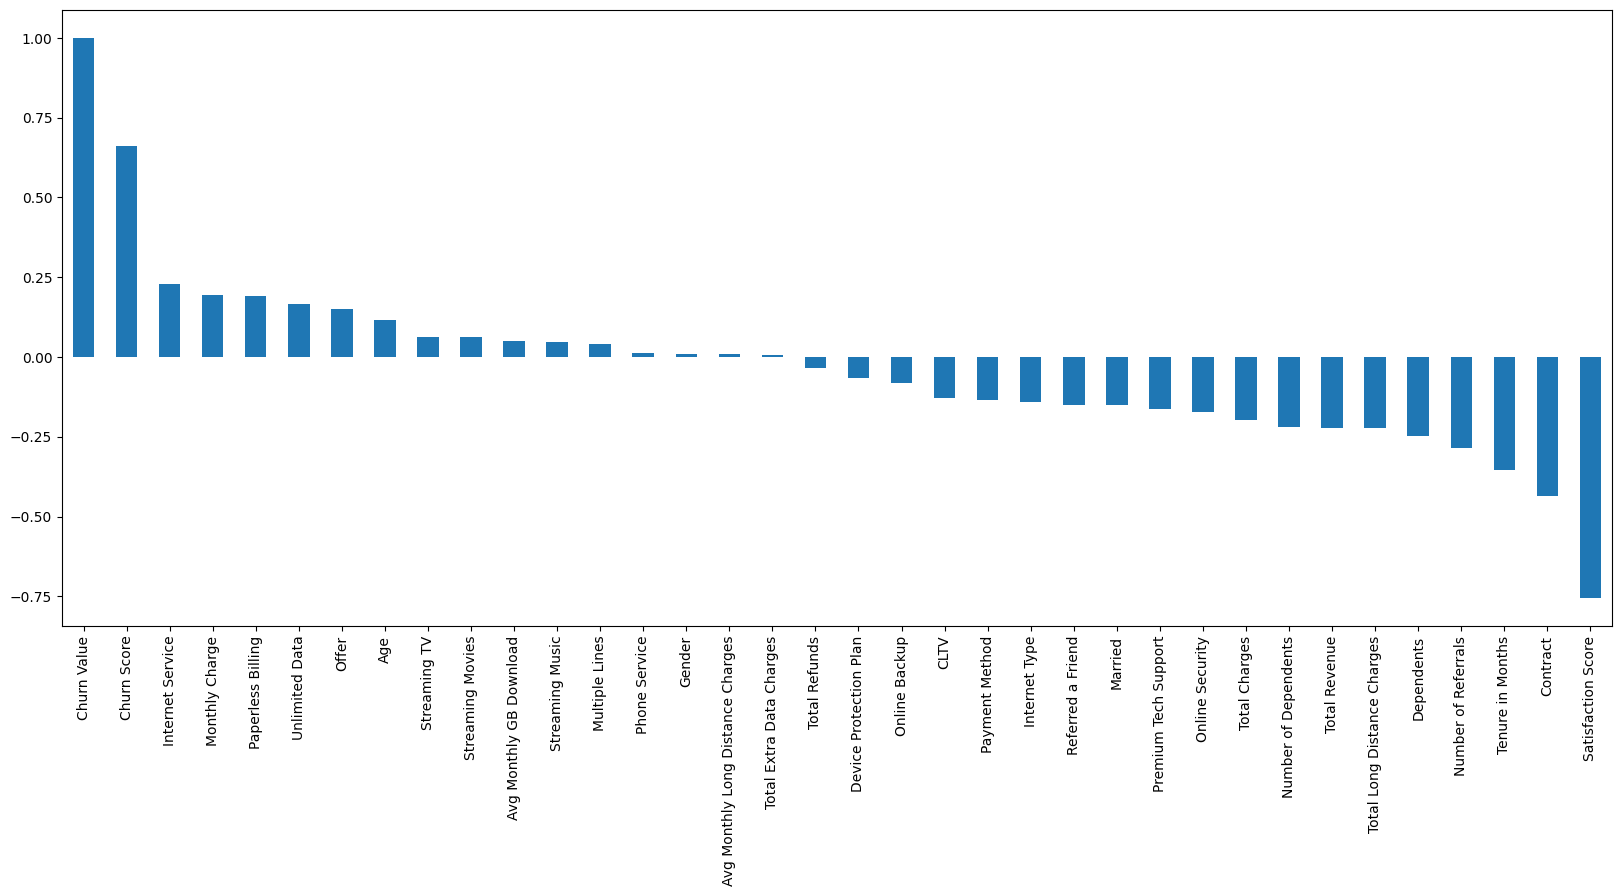

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
data.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

## Build Model



In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [ ]:
# Creat independent variable and dependent variable
X = data.drop('Churn Value', axis=1)
y = data['Churn Value']

In [ ]:
# Creat train and test spilt
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
# Khởi tạo và fit MinMaxScaler vào dữ liệu huấn luyện
scaler = MinMaxScaler()
scaler.fit(X_train)

# Chuẩn hóa dữ liệu huấn luyện và kiểm tra
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Dự đoán
y_pred = logreg.predict(X_test_scaled)

Text(0.5, 427.9555555555555, 'Predicted label')

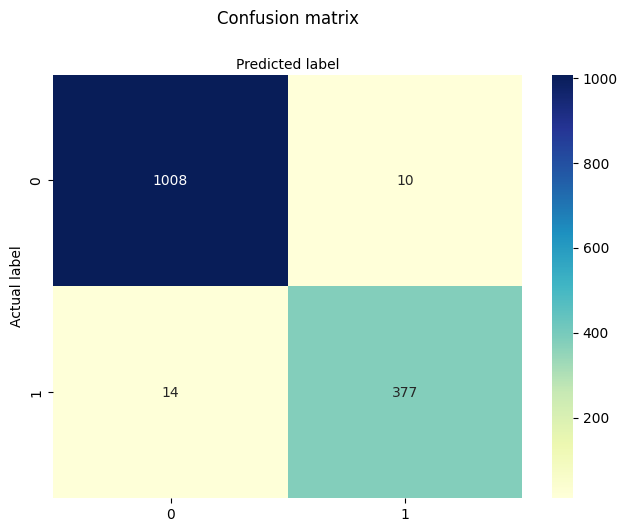

In [ ]:
import seaborn as sns
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1018
           1       0.97      0.96      0.97       391

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409



## Save Model

In [ ]:
import joblib

# Lưu mô hình
joblib.dump(logreg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

## Download Model

In [ ]:
from google.colab import files

files.download('logistic_regression_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Print values from Scaler

In [ ]:
# In các giá trị min và max của các đặc trưng được tính toán trong MinMaxScaler
print("Min values of features:", scaler.data_min_)
print("Max values of features:", scaler.data_max_)

Min values of features: [0.000e+00 1.900e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.825e+01 1.880e+01
 0.000e+00 0.000e+00 0.000e+00 2.136e+01 1.000e+00 5.000e+00 2.003e+03]
Max values of features: [1.000000e+00 8.000000e+01 1.000000e+00 1.000000e+00 9.000000e+00
 1.000000e+00 1.100000e+01 7.200000e+01 6.000000e+00 1.000000e+00
 4.999000e+01 1.000000e+00 1.000000e+00 4.000000e+00 8.500000e+01
 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
 1.000000e+00 1.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00
 3.000000e+00 1.187500e+02 8.672450e+03 4.979000e+01 1.500000e+02
 3.564000e+03 1.197934e+04 5.000000e+00 9.600000e+01 6.500000e+03]
